In [1]:
pip install pyti

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
read_yfinance_data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
finance_data = pd.DataFrame(read_yfinance_data)
print(finance_data.head(10))

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   
5  1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097223   48630400   
6  1980-12-22  0.132254  0.132813  0.132254  0.132254   0.101954   37363200   
7  1980-12-23  0.137835  0.138393  0.137835  0.137835   0.106257   46950400   
8  1980-12-24  0.145089  0.145647  0.145089  0.145089   0.111849   48003200   
9  1980-12-26  0.158482  0.159040  0.158482  0.158482   0.122173   55574400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0  

In [15]:
import pandas as pd
import numpy as np
import pandas as pd
read_yfinance_data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
finance_data = pd.DataFrame(read_yfinance_data)

# 1. Calculate Daily Return
finance_data['Daily_Return'] = finance_data['Adj Close'].pct_change()

# 2. Calculate Cumulative Return
finance_data['Cumulative_Return'] = (1 + finance_data['Daily_Return']).cumprod()

# 3. Calculate Volatility (Standard Deviation of Returns)
finance_data['Volatility'] = finance_data['Daily_Return'].rolling(window=20).std()

# 4. Calculate Moving Averages (20-day and 50-day)
finance_data['MA_20'] = finance_data['Adj Close'].rolling(window=20).mean()
finance_data['MA_50'] = finance_data['Adj Close'].rolling(window=50).mean()

# 5. Calculate Sharpe Ratio (assuming a risk-free rate of 0 for simplicity)
finance_data['Excess_Return'] = finance_data['Daily_Return']  # If no risk-free rate is provided
finance_data['Sharpe_Ratio'] = finance_data['Excess_Return'].mean() / finance_data['Volatility']

# Display the DataFrame with the new metrics
print(finance_data[['Date','Daily_Return', 'Cumulative_Return', 'Volatility', 'MA_20', 'MA_50', 'Sharpe_Ratio']].tail(50))


             Date  Daily_Return  Cumulative_Return  Volatility       MA_20  \
10948  2024-05-17      0.000158        1916.760794    0.016249  178.033547   
10949  2024-05-20      0.006162        1928.572014    0.016244  179.303310   
10950  2024-05-21      0.006857        1941.796793    0.016243  180.585630   
10951  2024-05-22     -0.007538        1927.158763    0.016517  181.689799   
10952  2024-05-23     -0.021058        1886.576393    0.017616  182.549809   
10953  2024-05-24      0.016588        1917.871161    0.017680  183.594066   
10954  2024-05-28      0.000053        1917.972327    0.017152  184.429350   
10955  2024-05-29      0.001579        1921.000699    0.016303  185.437718   
10956  2024-05-30      0.005255        1931.095785    0.016067  186.547399   
10957  2024-05-31      0.005019        1940.787130    0.015635  187.518993   
10958  2024-06-03      0.009259        1958.756414    0.009111  188.063283   
10959  2024-06-04      0.001649        1961.986965    0.008669  

KeyError: 'Daily_Return'

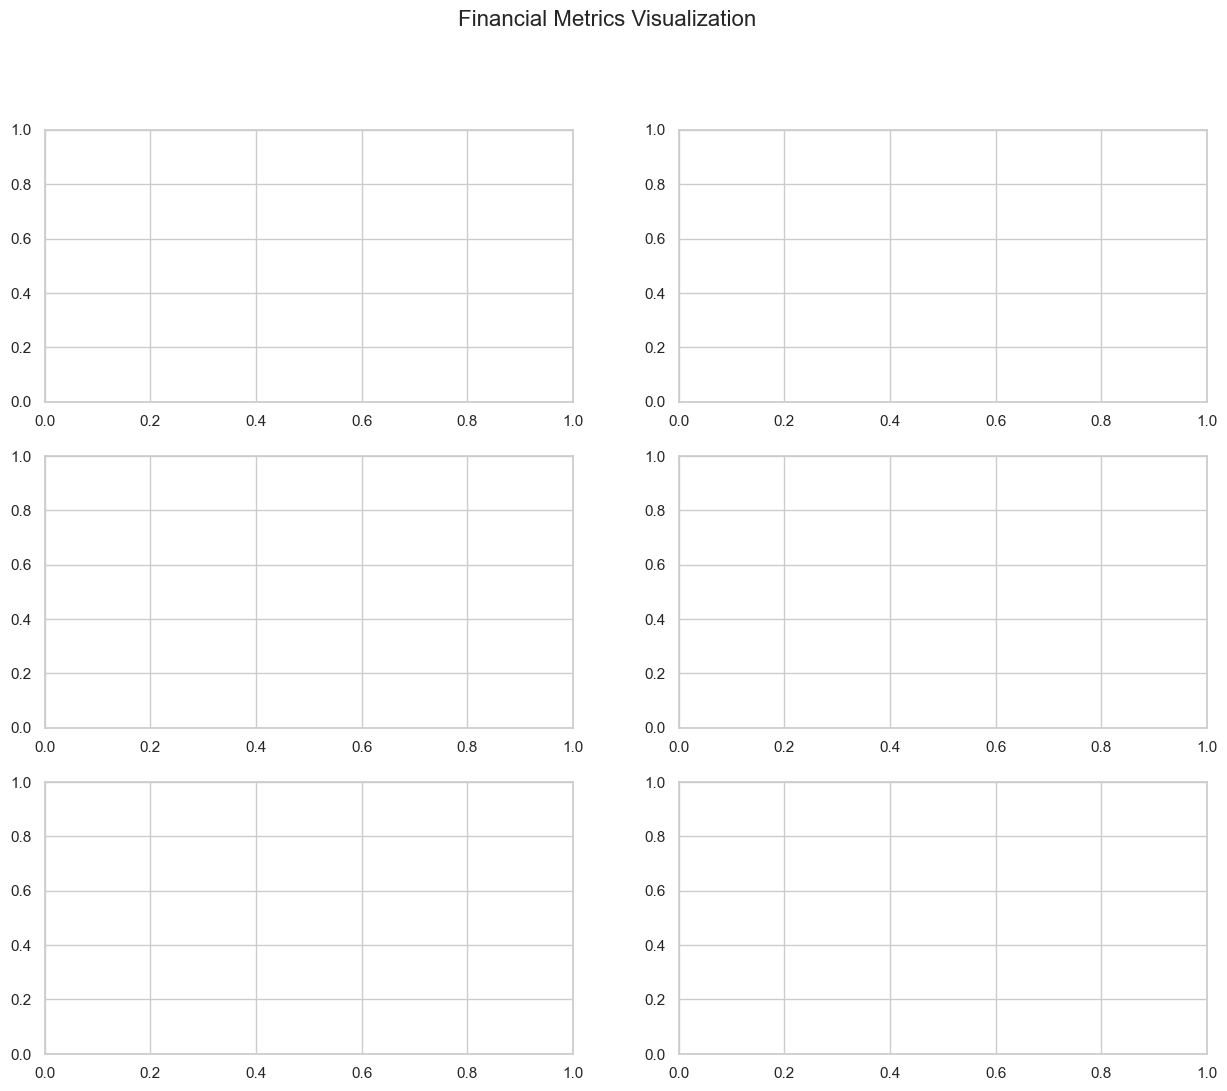

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
read_yfinance_data = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
finance_data = pd.DataFrame(read_yfinance_data)
# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.suptitle('Financial Metrics Visualization', fontsize=16)

# 1. Plot Daily Return
sns.lineplot(ax=axes[0, 0], x=finance_data['Date'], y=finance_data['Daily_Return'], color="blue")
axes[0, 0].set_title('Daily Return')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Daily Return')

# 2. Plot Cumulative Return
sns.lineplot(ax=axes[0, 1], x=finance_data['Date'], y=finance_data['Cumulative_Return'], color="green")
axes[0, 1].set_title('Cumulative Return')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Cumulative Return')

# 3. Plot Volatility (Standard Deviation of Returns)
sns.lineplot(ax=axes[1, 0], x=finance_data['Date'], y=finance_data['Volatility'], color="red")
axes[1, 0].set_title('Volatility (20-day rolling std of returns)')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Volatility')

# 4. Plot Moving Averages (20-day and 50-day)
sns.lineplot(ax=axes[1, 1], x=finance_data['Date'], y=finance_data['MA_20'], color="purple", label="MA 20")
sns.lineplot(ax=axes[1, 1], x=finance_data['Date'], y=finance_data['MA_50'], color="orange", label="MA 50")
axes[1, 1].set_title('Moving Averages (20-day & 50-day)')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Moving Average')
axes[1, 1].legend()

# 5. Plot Sharpe Ratio
sns.lineplot(ax=axes[2, 0], x=finance_data['Date'], y=finance_data['Sharpe_Ratio'], color="brown")
axes[2, 0].set_title('Sharpe Ratio')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Sharpe Ratio')

# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
